**Author**: Simon Richard

In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet('../../data/series_train.parquet', dtype_backend='pyarrow')
df.head()

,step,X,Y,Z,enmo,anglez,non-wear_flag,light,battery_voltage,time_of_day,weekday,quarter,relative_date_PCIAT,id
0,0,0.021536,0.022214,-1.02237,0.022853,-88.280762,0.0,53.0,4188.0,56940000000000,4,3,41.0,00115b9f
1,1,0.022005,0.022187,-1.01974,0.020231,-88.241707,0.0,51.666668,4188.166504,56945000000000,4,3,41.0,00115b9f
2,2,0.02224,0.022005,-1.019401,0.019893,-88.170067,0.0,50.333332,4188.333496,56950000000000,4,3,41.0,00115b9f
3,3,0.021589,0.022578,-1.018177,0.018667,-88.250031,0.0,50.5,4188.5,56955000000000,4,3,41.0,00115b9f
4,4,0.022005,0.023763,-1.014323,0.016848,-88.130775,0.0,33.166668,4181.0,57235000000000,4,3,41.0,00115b9f


In [3]:
df['time_of_day'].min(), df['time_of_day'].max()

(0, 86395000000000)

In [4]:
grouped = df.groupby('id')
ids = list(grouped.groups.keys())

In [5]:
maxes = grouped['relative_date_PCIAT'].max(); maxes
mins = grouped['relative_date_PCIAT'].min(); mins
lengths = maxes - mins

<Axes: xlabel='Length (in days)', ylabel='Frequency'>

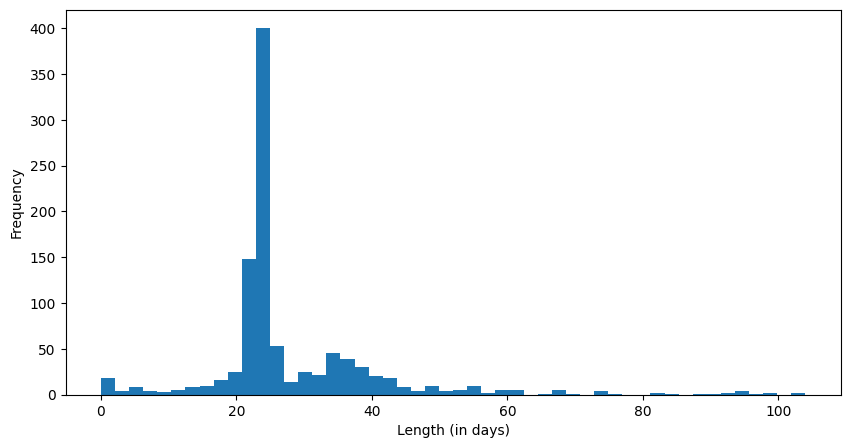

In [6]:
lengths.plot(kind='hist', figsize=(10,5), bins=50, xlabel="Length (in days)")

<Axes: ylabel='Frequency'>

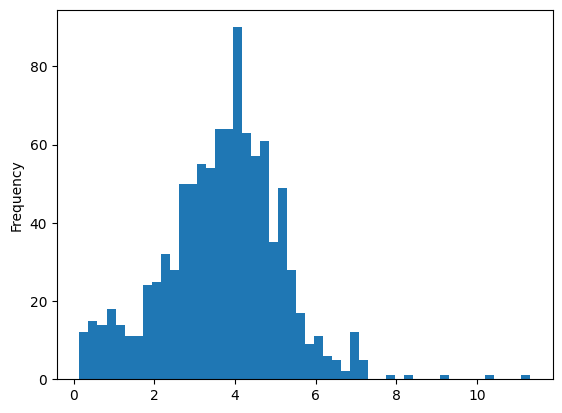

In [8]:
enmos = grouped['enmo']
mins = enmos.min()
maxs = enmos.max()
range_ = maxs - mins
range_.plot(kind='hist', bins=50)

<Axes: xlabel='Mean ENMO for each Patient', ylabel='Frequency'>

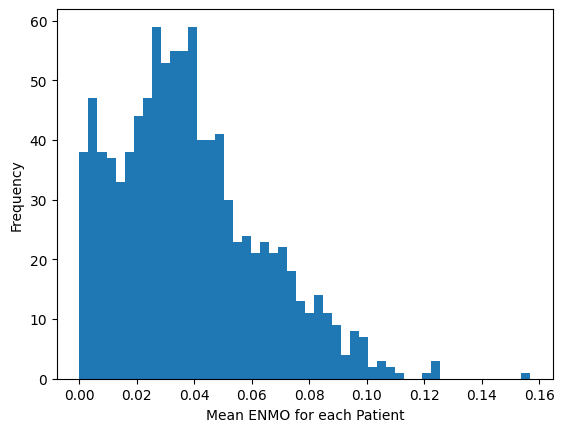

In [9]:
enmos.mean().plot(kind='hist', bins=50, xlabel='Mean ENMO for each Patient', ylabel='Frequency')

<Axes: xlabel='Time Step', ylabel='ENMO'>

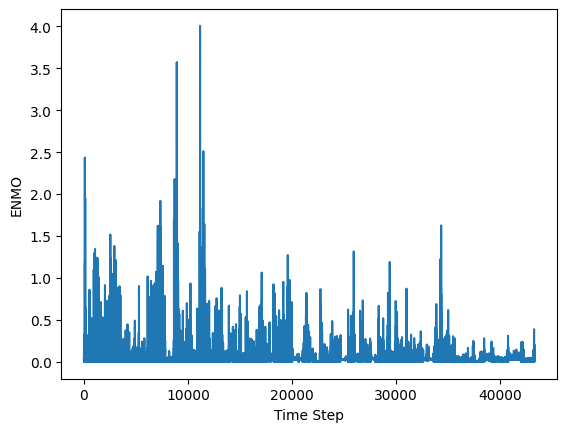

In [10]:
enmos.get_group(ids[0]).plot(kind='line', xlabel="Time Step", ylabel="ENMO")

<Axes: ylabel='Frequency'>

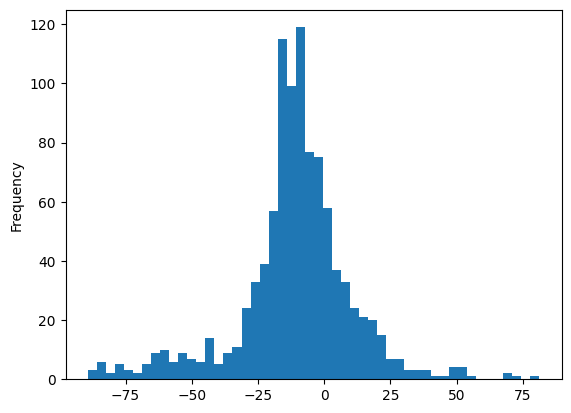

In [10]:
grouped['anglez'].mean().plot(kind='hist', bins=50)

<Axes: ylabel='Frequency'>

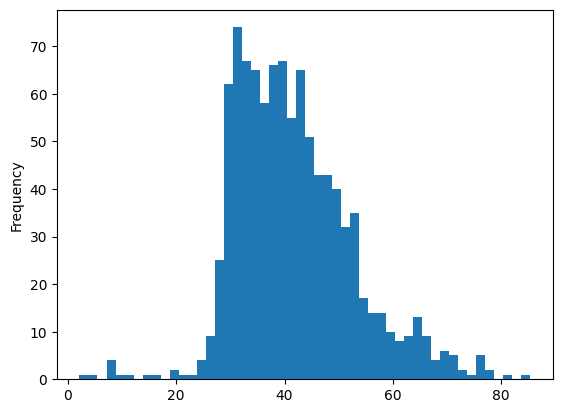

In [11]:
grouped['anglez'].std().plot(kind='hist', bins=50)

<Axes: ylabel='Frequency'>

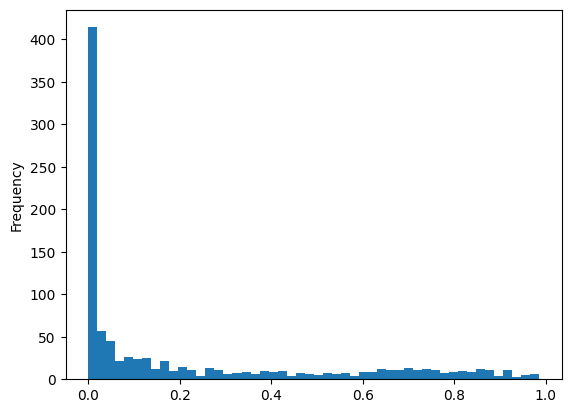

In [12]:
grouped['non-wear_flag'].mean().plot(kind='hist', bins=50)

In [13]:
(grouped['non-wear_flag'].mean() == 0).mean()

0.3493975903614458

this means that 34.9% (most likely) wore the device for the entire time.

<Axes: ylabel='Frequency'>

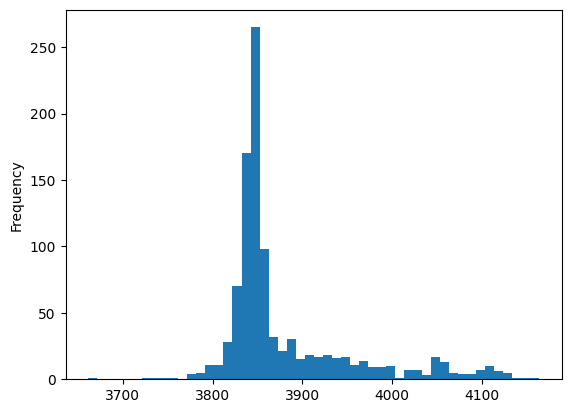

In [14]:
grouped['battery_voltage'].mean().plot(kind='hist', bins=50)

<Axes: ylabel='Frequency'>

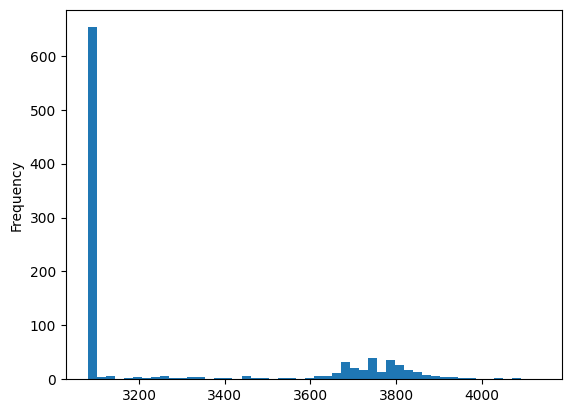

In [15]:
grouped['battery_voltage'].min().plot(kind='hist', bins=50)

<Axes: ylabel='Frequency'>

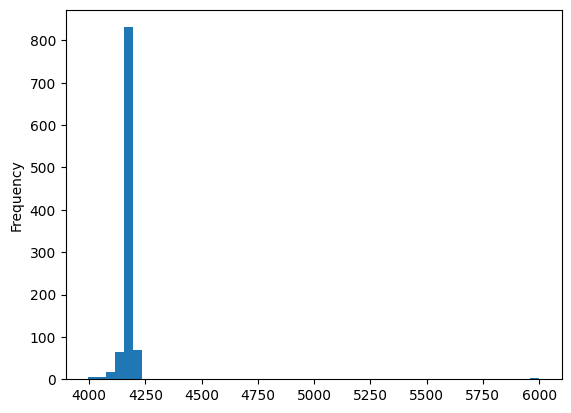

In [16]:
grouped['battery_voltage'].max().plot(kind='hist', bins=50)

<Axes: ylabel='Frequency'>

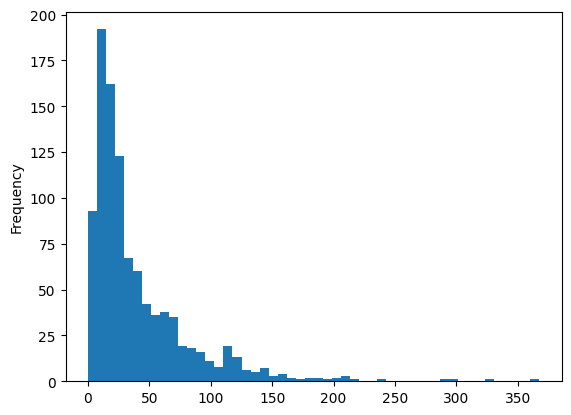

In [17]:
grouped['light'].mean().plot(kind='hist', bins=50)

<Axes: ylabel='Frequency'>

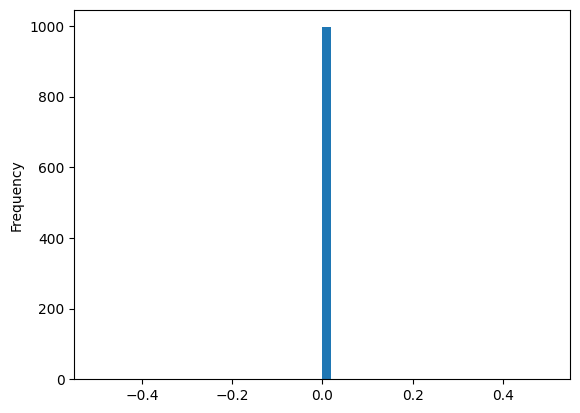

In [18]:
grouped['light'].min().plot(kind='hist', bins=50)

<Axes: ylabel='Frequency'>

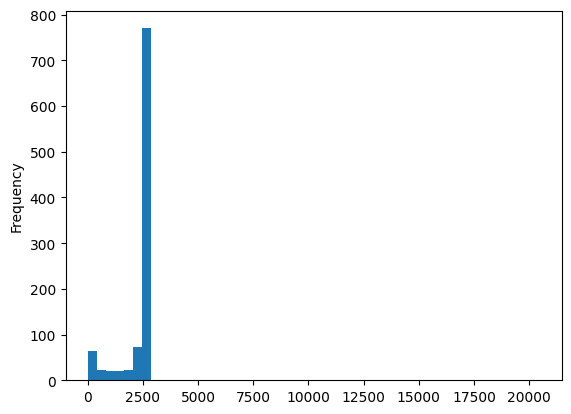

In [19]:
grouped['light'].max().plot(kind='hist', bins=50)

In [20]:
(grouped['light'].max() < 500).mean()

0.06726907630522089

this means 6.7% (probably) never took the device outside.

<Axes: xlabel='enmo', ylabel='non-wear_flag'>

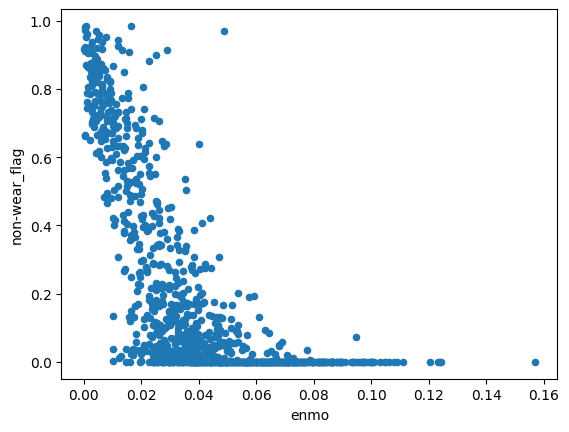

In [21]:
grouped[['enmo', 'non-wear_flag']].mean().plot(kind='scatter', x='enmo', y='non-wear_flag')

In [ ]:
import seaborn as sns
sns.boxplot(data=df, x='quarter', y='enmo')